<a href="https://colab.research.google.com/github/barry80417/titanic-analysis/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

用github內的資料直接讀進來

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
set(df_train)-set(df_test)

In [ ]:
df_train.info()

 Link: https://www.kaggle.com/competitions/titanic/data

Survived: Survived (1) or died (0)

Pclass: Passenger’s class

Name: Passenger’s name

Sex: Passenger’s sex

Age: Passenger’s age

SibSp: define brother,sister,husband,wife...

Parch: define mother,father,daughter,son...

Ticket: ticket number

Fare:ticket fare

Cabin:cabin number

Embarked:port of embarkation (C=Cherbourg,Q=Queenstown,S=Southampton)

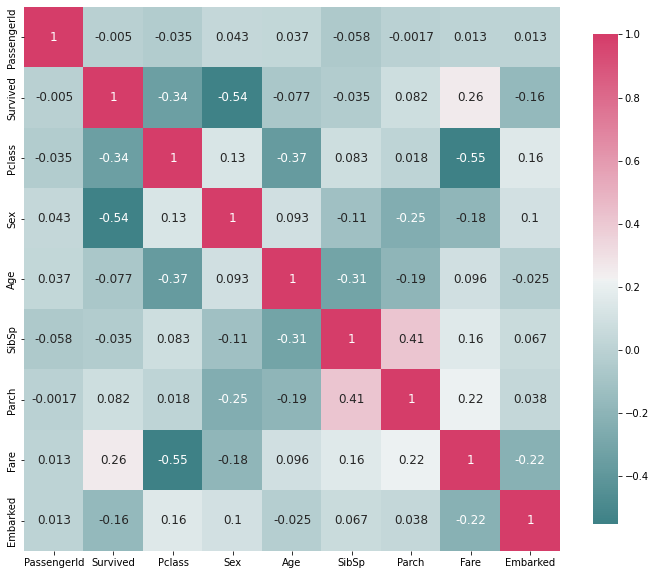

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette(200, 0, as_cmap = True)
sns.heatmap(
    corr,
    cmap=cmap,
    square = False,
    cbar_kws = {'shrink': .9}, #顏色條大小
    ax = plt.subplots(figsize =(12,10))[1],
    annot = True,
    annot_kws = {'fontsize':12} #字體大小
)                             

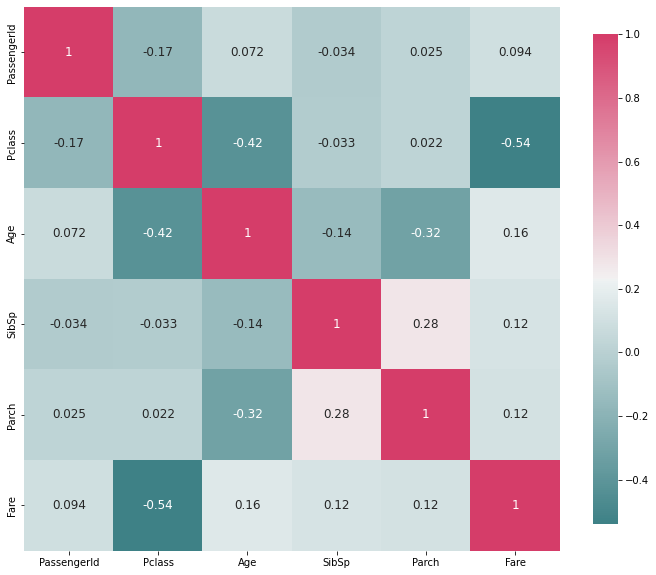

In [ ]:
sur = (df_train['Survived']==1)
df_sur = df_train[sur].drop(['Survived'],axis = 1)
corr = df_sur.corr()
cmap = sns.diverging_palette(200, 0, as_cmap = True)
sns.heatmap(
    corr,
    cmap=cmap,
    square = False,
    cbar_kws = {'shrink': .9}, #顏色條大小
    ax = plt.subplots(figsize =(12,10))[1],
    annot = True,
    annot_kws = {'fontsize':12} #字體大小
)                             

所有生還的人其他的資料是否有相關為看不出關聯

In [85]:
df_train = df_train.drop(['Name','Ticket','Cabin'],axis = 1)

刪除看起來比較沒用的資料'Name','Ticket','Cabin'

In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])

看是否有空值

In [82]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode())
df_train['Embarked'] = labelencoder.fit_transform(df_train['Embarked'])
df_train = pd.get_dummies(df_train, columns = ['Embarked'])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2,Embarked_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,NaN,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,0,0,0


將Age用眾數填補空值，Embarked用眾數填補空值

In [86]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.7877095 , 0.78651685, 0.78089888, 0.76966292, 0.82022472])

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_0   891 non-null    uint8  
 12  Embarked_1   891 non-null    uint8  
 13  Embarked_2   891 non-null    uint8  
 14  Embarked_3   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(4)
memory usage: 80.2+ KB
